Производство

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as MAE
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

Индекс промышленного производства по РФ, % м/м

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

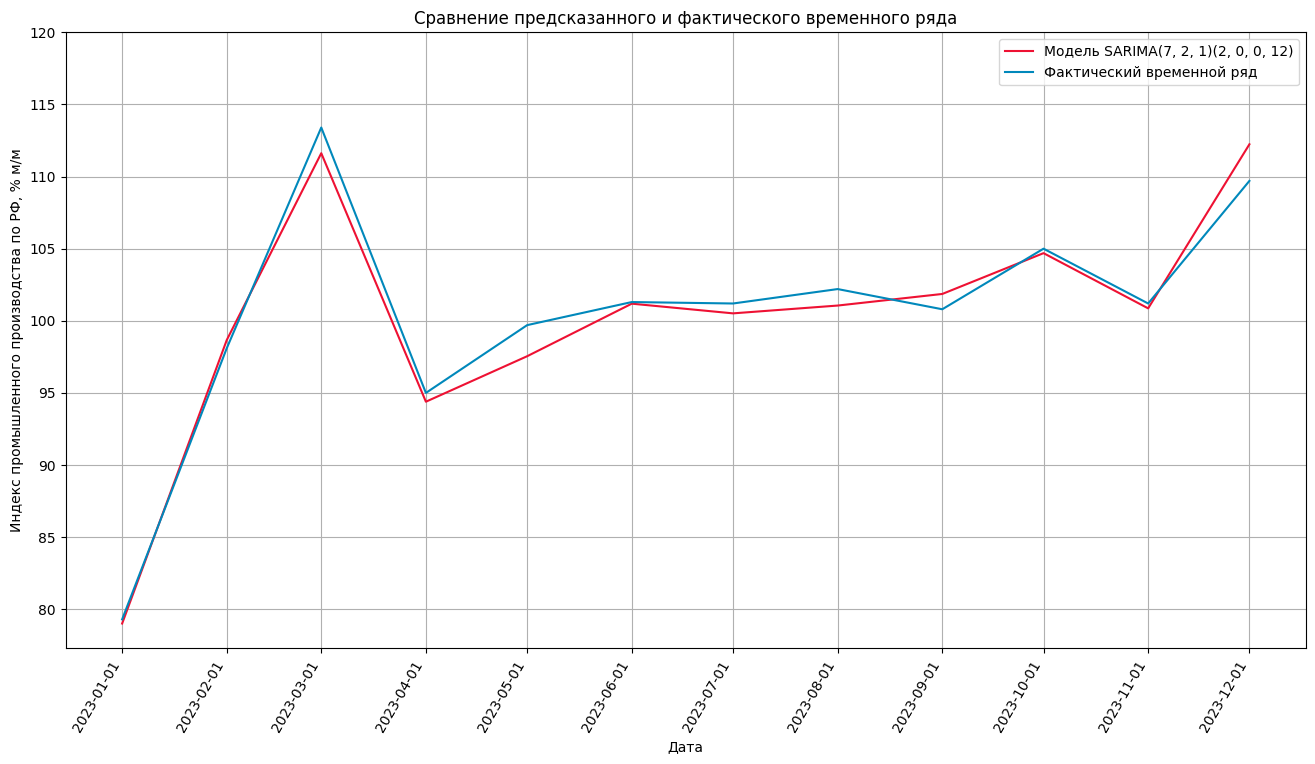

MSE: 1.5129777690449628
MAE: 0.9654877440266224
R^2: 0.9761711549028418
RMSE: 1.2300316130266582


In [160]:
df = pd.read_excel('Задание.xlsx', sheet_name='Производство')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Индекс промышленного производства по РФ, % м/м']].copy()

""""
plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс промышленного производства по РФ, % м/м'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по РФ, % м/м')  
plt.title('График индекса физического объема оборота розничной торговли в РФ')  
"""

p, d, q = 7, 2, 1

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс промышленного производства по РФ, % м/м'][:-12], order=(p, d, q), seasonal_order=(2, 0, 0, 12))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс промышленного производства по РФ, % м/м'][:-12]), end=len(df['Индекс промышленного производства по РФ, % м/м']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс промышленного производства по РФ, % м/м'][-12:], '#0088BB', label='Фактический временной ряд')
plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по РФ, % м/м')   
plt.title('Сравнение предсказанного и фактического временного ряда')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс промышленного производства по РФ, % м/м'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс промышленного производства по РФ, % м/м'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс промышленного производства по РФ, % м/м'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Индекс промышленного производства по РФ, % м/м'][-12:], SARIMA_predictions)))

In [161]:
with open('production_rf_mom.pkl', 'wb') as file:
    pickle.dump(SARIMA_result, file)

Предсказание следующих трех месяцев 

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     79.011386
49     98.667459
50    111.619514
Name: predicted_mean, dtype: float64


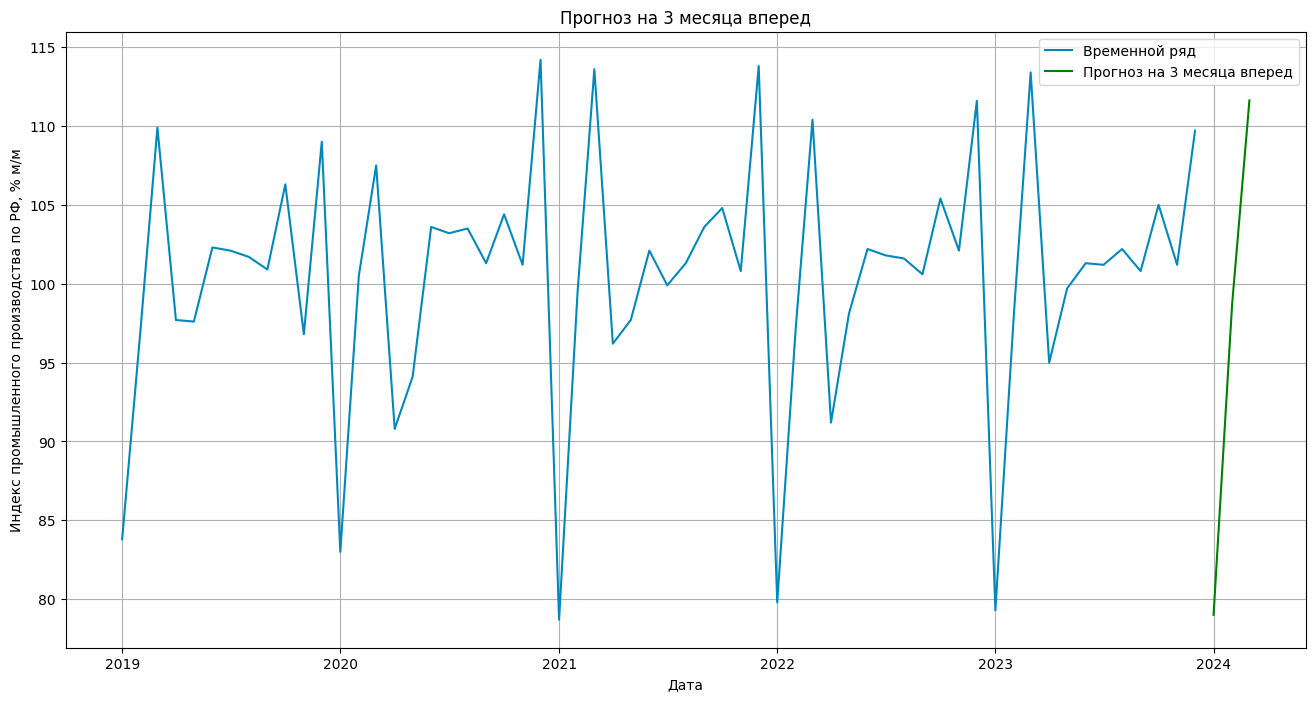

In [148]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 120+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс промышленного производства по РФ, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по РФ, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Индекс промышленного производства по Москве, % м/м

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


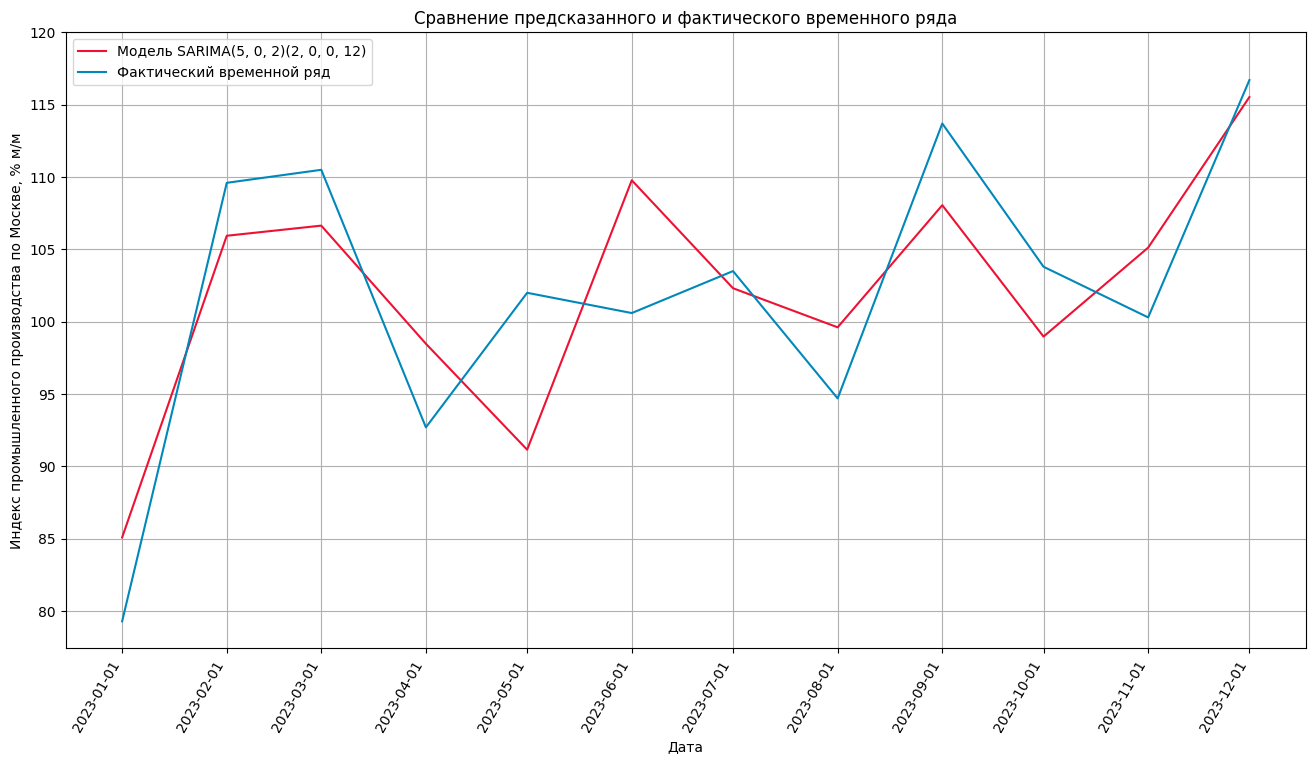

MSE: 33.53308394682767
MAE: 5.139723676233305
R^2: 0.6493078711429836
RMSE: 5.790775763818495


In [162]:
df = pd.read_excel('Задание.xlsx', sheet_name='Производство')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Индекс промышленного производства по Москве, % м/м']].copy()

"""
plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс промышленного производства по Москве, % м/м'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Москве, % м/м')  
plt.title('График индекса физического объема оборота розничной торговли в Москве')  
"""

p, d, q = 5, 0, 2

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс промышленного производства по Москве, % м/м'][:-12], order=(p, d, q), seasonal_order=(1, 0, 1, 12))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс промышленного производства по Москве, % м/м'][:-12]), end=len(df['Индекс промышленного производства по Москве, % м/м']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс промышленного производства по Москве, % м/м'][-12:], '#0088BB', label='Фактический временной ряд')
plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Москве, % м/м')   
plt.title('Сравнение предсказанного и фактического временного ряда')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс промышленного производства по Москве, % м/м'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс промышленного производства по Москве, % м/м'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс промышленного производства по Москве, % м/м'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Индекс промышленного производства по Москве, % м/м'][-12:], SARIMA_predictions)))

In [163]:
with open('production_m_mom.pkl', 'wb') as file:
    pickle.dump(SARIMA_result, file)

Предсказание следующих трех месяцев 

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     85.093449
49    105.942001
50    106.642014
Name: predicted_mean, dtype: float64


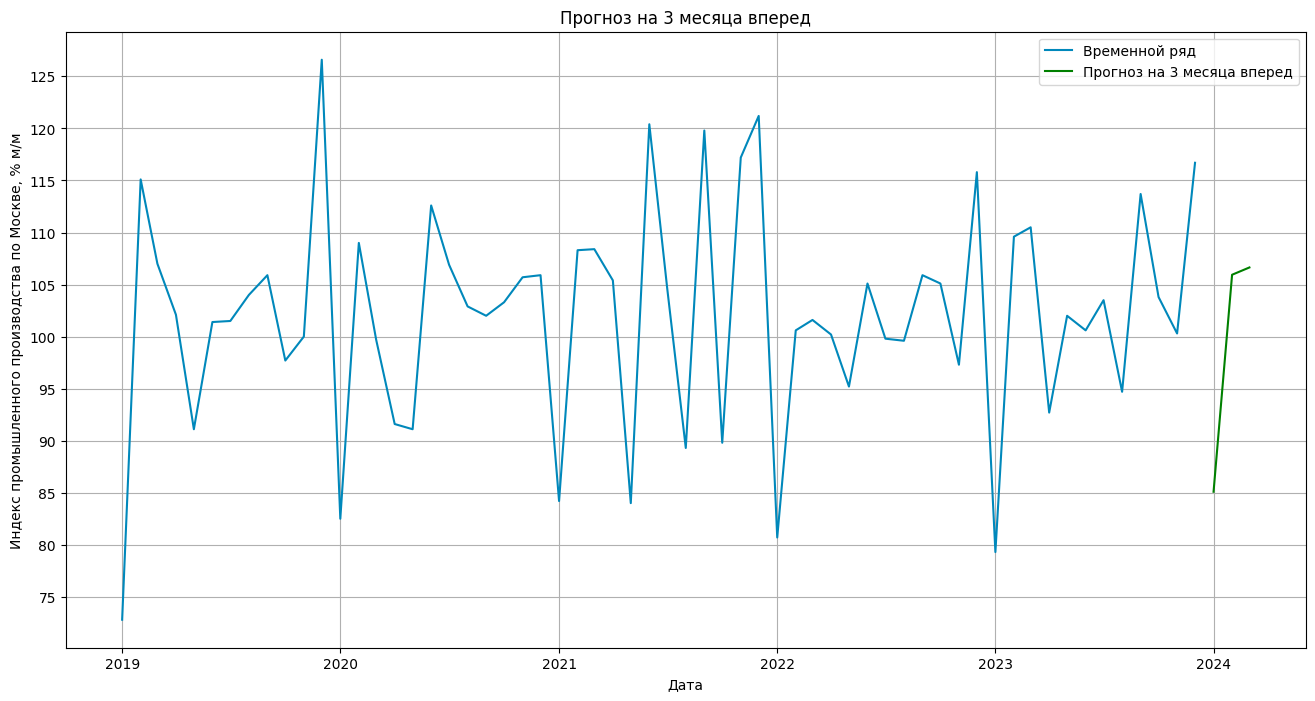

In [150]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 130+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс промышленного производства по Москве, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Москве, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Индекс промышленного производства по Московской области, % м/м

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


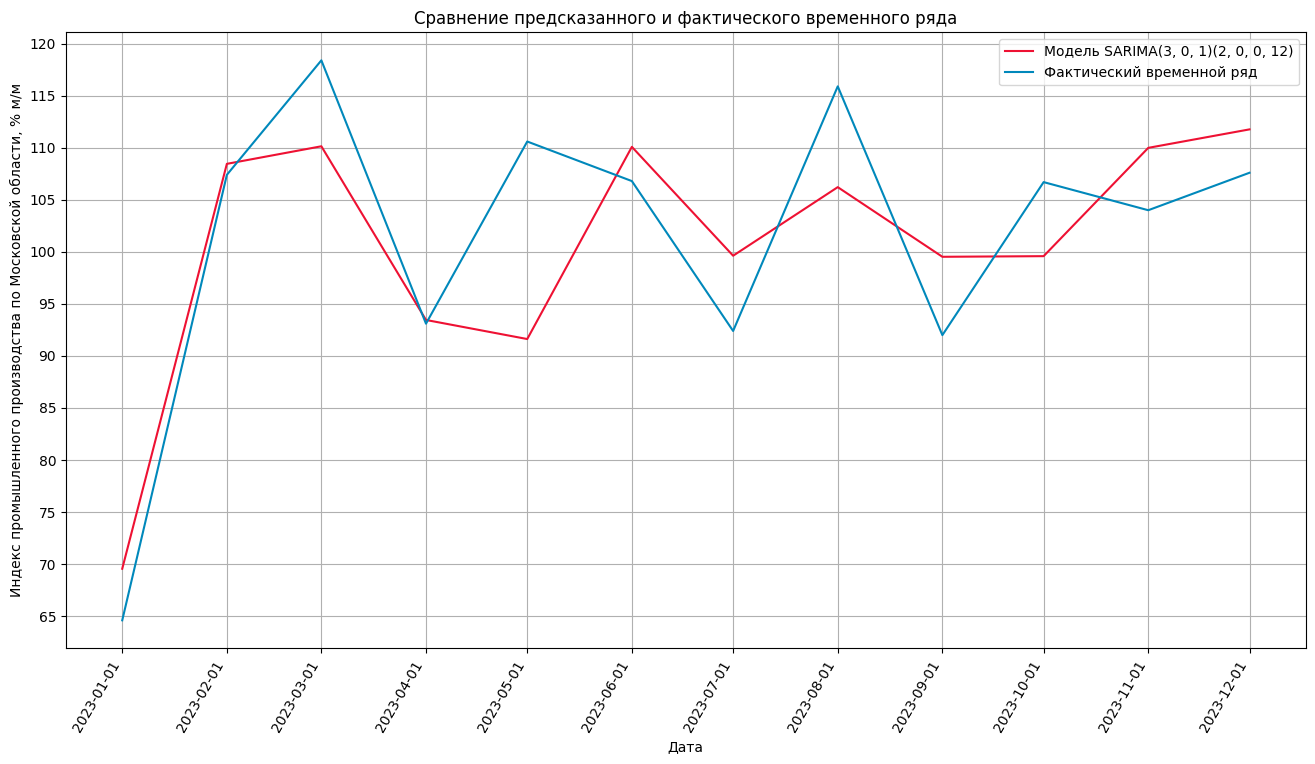

MSE: 64.28286613124484
MAE: 6.549780257002637
R^2: 0.6666723300914507
RMSE: 8.01765964176859


In [164]:
df = pd.read_excel('Задание.xlsx', sheet_name='Производство')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Индекс промышленного производства по Московской области, % м/м']].copy()

""""
plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс промышленного производства по Московской области, % м/м'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Московской области, % м/м')  
plt.title('График индекса физического объема оборота розничной торговли в Московской области')  
"""

p, d, q = 3, 0, 1

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс промышленного производства по Московской области, % м/м'][:-12], order=(p, d, q), seasonal_order=(1, 0, 0, 12))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс промышленного производства по Московской области, % м/м'][:-12]), end=len(df['Индекс промышленного производства по Московской области, % м/м']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс промышленного производства по Московской области, % м/м'][-12:], '#0088BB', label='Фактический временной ряд')
plt.grid(True) 
plt.legend()
plt.yticks(np.arange(65, 120+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Московской области, % м/м')   
plt.title('Сравнение предсказанного и фактического временного ряда')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс промышленного производства по Московской области, % м/м'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс промышленного производства по Московской области, % м/м'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс промышленного производства по Московской области, % м/м'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Индекс промышленного производства по Московской области, % м/м'][-12:], SARIMA_predictions)))

In [ ]:
with open('production_mo_mom.pkl', 'wb') as file:
    pickle.dump(SARIMA_result, file)

Предсказание следующих трех месяцев 

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     69.555498
49    108.455341
50    110.142379
Name: predicted_mean, dtype: float64


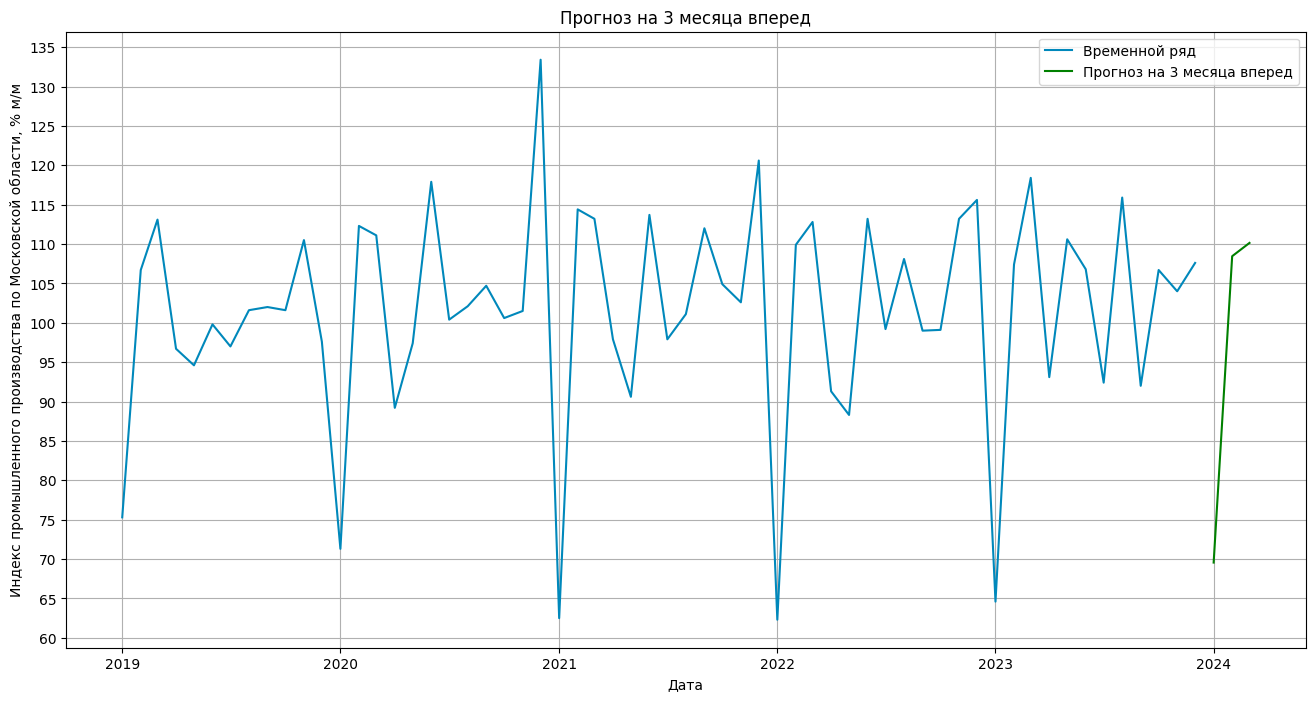

In [152]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(60, 135+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс промышленного производства по Московской области, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Московской области, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Индекс промышленного производства по РФ, % г/г

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


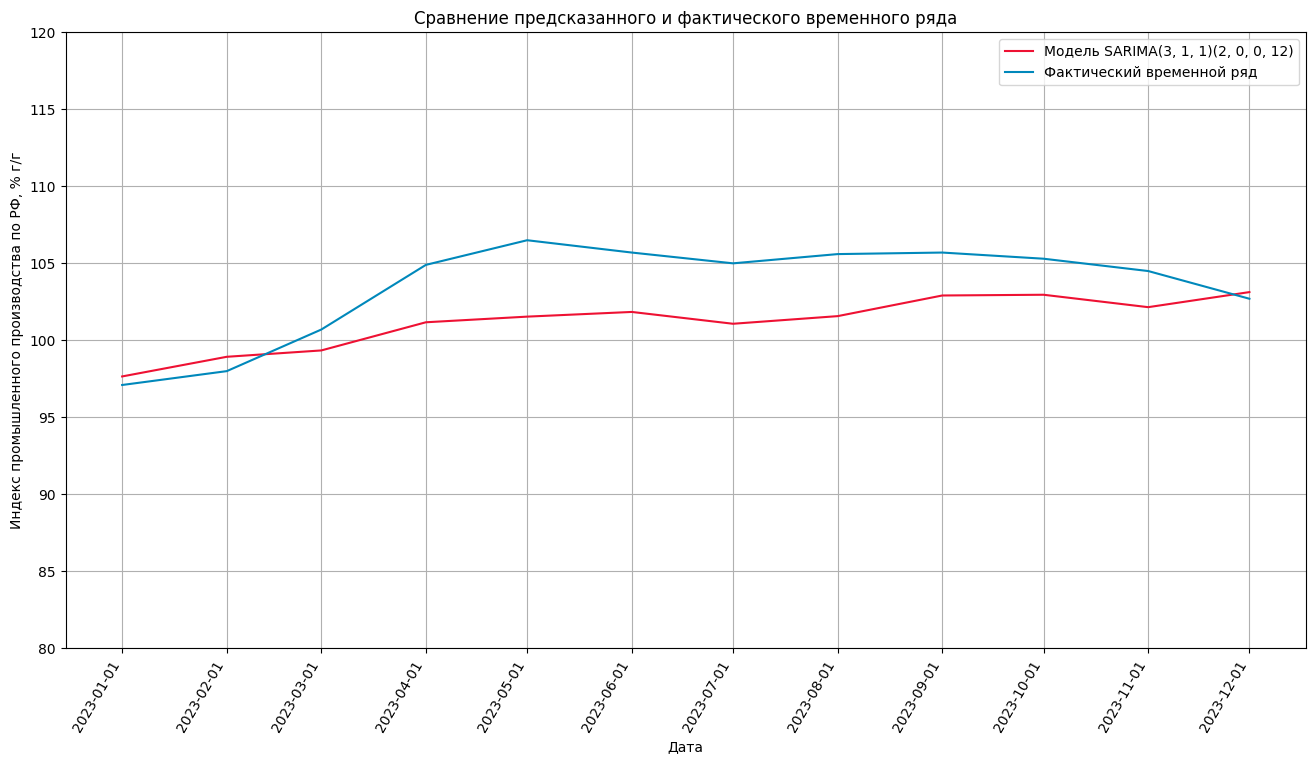

MSE: 8.913431563470093
MAE: 2.603892788491919
R^2: 0.03831348187964623
RMSE: 2.9855370644944426


In [153]:
df = pd.read_excel('Задание.xlsx', sheet_name='Производство')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Индекс промышленного производства по РФ, % г/г']].copy()

""""
plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс промышленного производства по РФ, % г/г'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по РФ, % г/г')  
plt.title('График индекса физического объема оборота розничной торговли в РФ')  
"""

p, d, q = 3, 1, 1

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс промышленного производства по РФ, % г/г'][:-12], order=(p, d, q), seasonal_order=(3, 0, 1, 4))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс промышленного производства по РФ, % г/г'][:-12]), end=len(df['Индекс промышленного производства по РФ, % г/г']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс промышленного производства по РФ, % г/г'][-12:], '#0088BB', label='Фактический временной ряд')
plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по РФ, % г/г')   
plt.title('Сравнение предсказанного и фактического временного ряда')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс промышленного производства по РФ, % г/г'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс промышленного производства по РФ, % г/г'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс промышленного производства по РФ, % г/г'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Индекс промышленного производства по РФ, % г/г'][-12:], SARIMA_predictions)))

Предсказание следующих трех месяцев 

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48    97.655041
49    98.931013
50    99.343465
Name: predicted_mean, dtype: float64


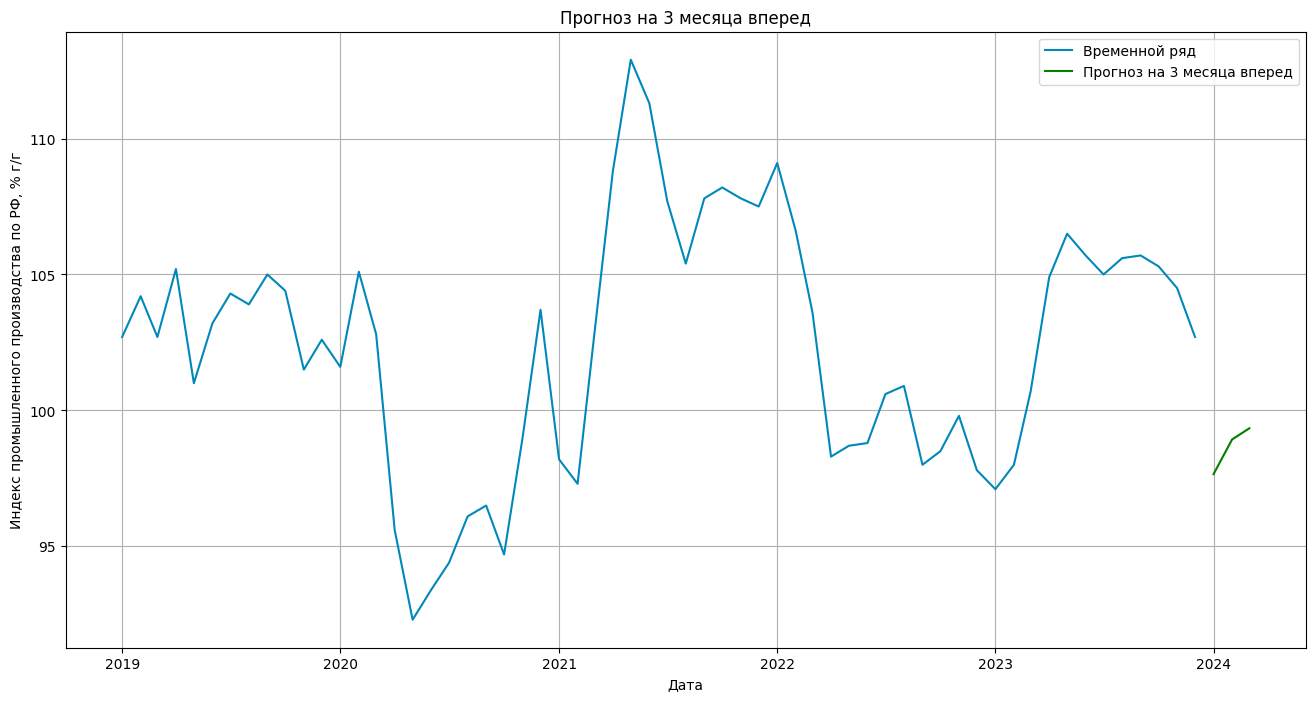

In [124]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 120+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс промышленного производства по РФ, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по РФ, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Индекс промышленного производства по Москве, % г/г

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


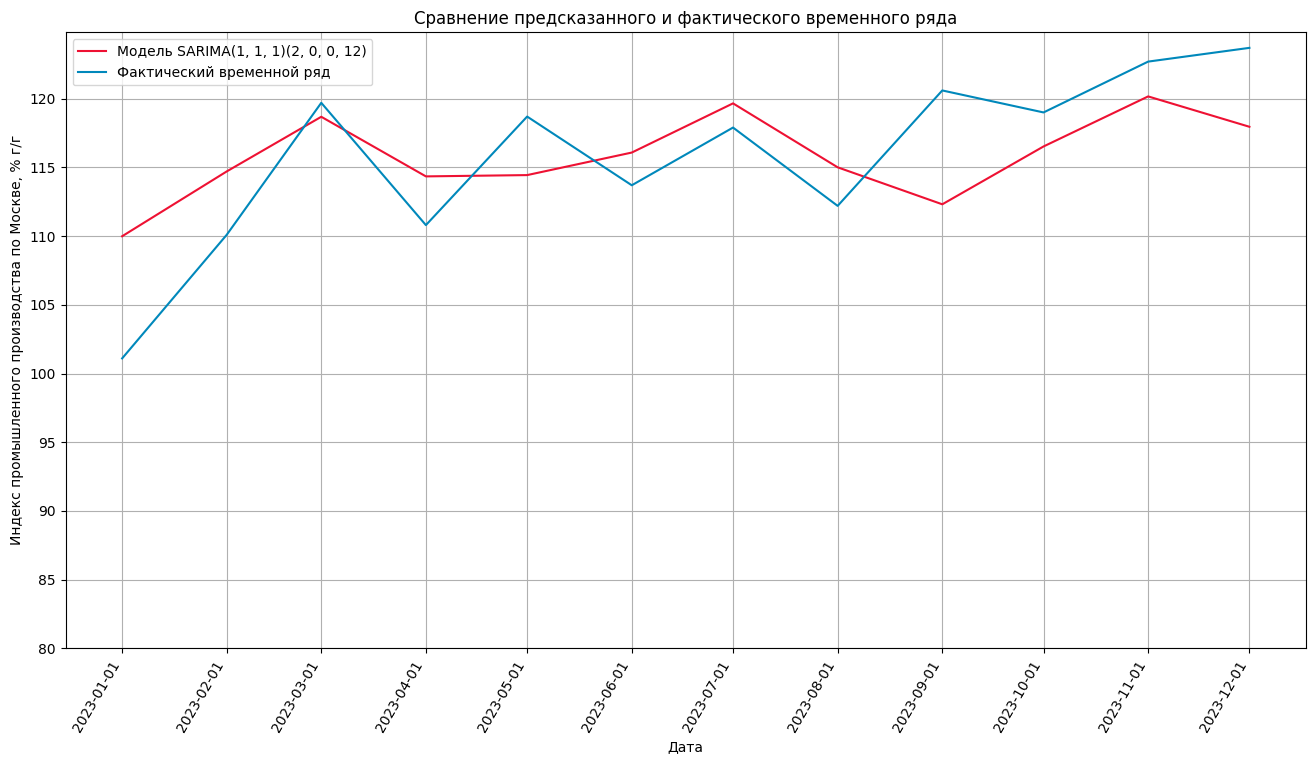

MSE: 21.90444733979821
MAE: 4.025513689620961
R^2: 0.4313610209246548
RMSE: 4.680218727773116


In [154]:
df = pd.read_excel('Задание.xlsx', sheet_name='Производство')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Индекс промышленного производства по Москве, % г/г']].copy()

""""
plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс промышленного производства по Москве, % г/г'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Москве, % г/г')  
plt.title('График индекса физического объема оборота розничной торговли в Москве')  
"""

p, d, q = 1, 1, 1

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс промышленного производства по Москве, % г/г'][:-12], order=(p, d, q), seasonal_order=(0, 0, 3, 4))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс промышленного производства по Москве, % г/г'][:-12]), end=len(df['Индекс промышленного производства по Москве, % г/г']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс промышленного производства по Москве, % г/г'][-12:], '#0088BB', label='Фактический временной ряд')
plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 120+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Москве, % г/г')   
plt.title('Сравнение предсказанного и фактического временного ряда')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс промышленного производства по Москве, % г/г'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс промышленного производства по Москве, % г/г'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс промышленного производства по Москве, % г/г'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Индекс промышленного производства по Москве, % г/г'][-12:], SARIMA_predictions)))

Предсказание следующих трех месяцев 

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48    109.990126
49    114.708907
50    118.684838
Name: predicted_mean, dtype: float64


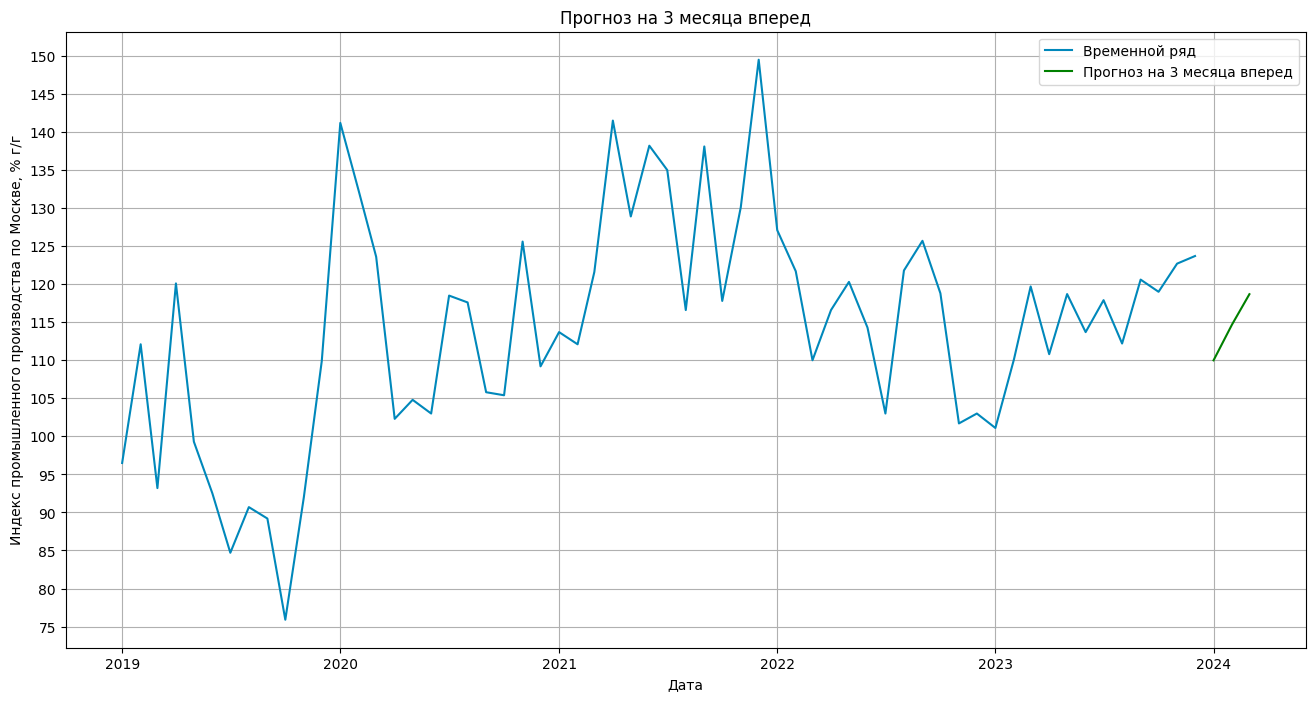

In [155]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 160+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс промышленного производства по Москве, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Москве, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

Индекс промышленного производства по Московской области, % г/г

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


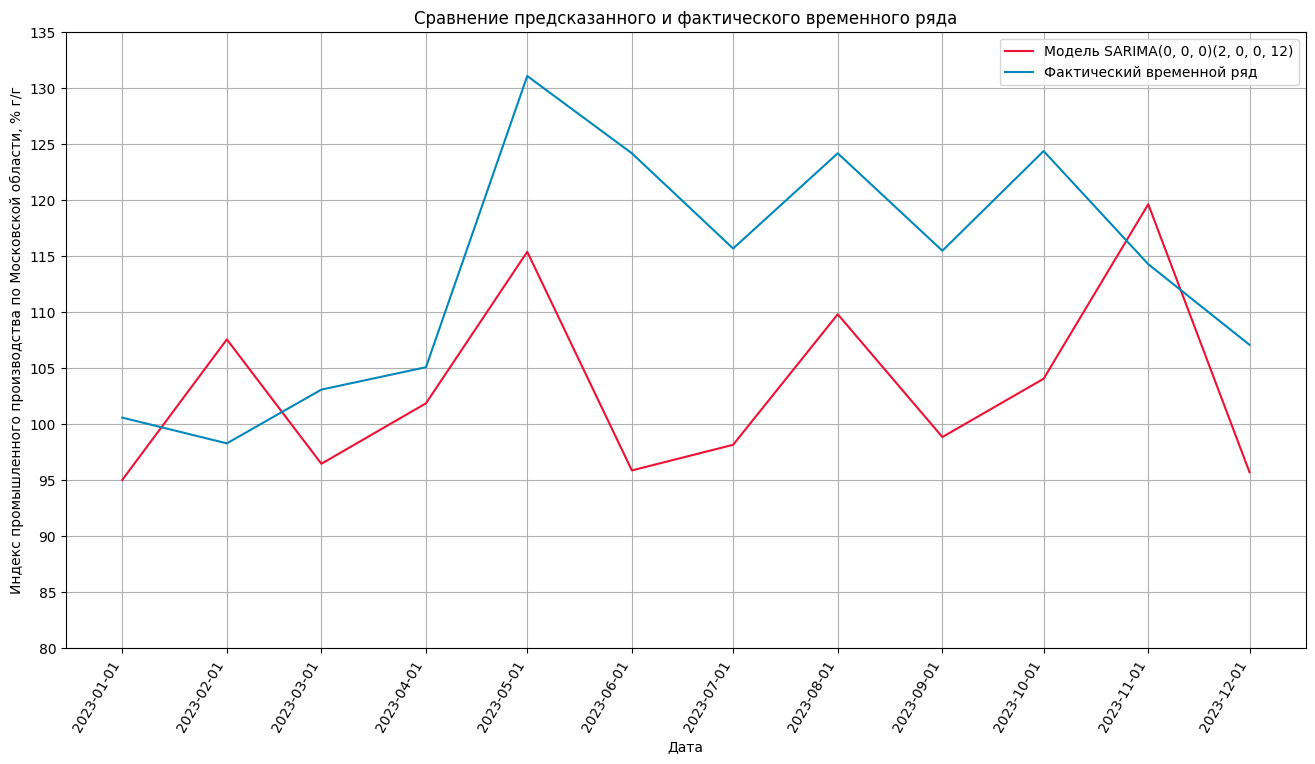

MSE: 215.0968340212955
MAE: 12.857539464538112
R^2: -1.0103342882276092
RMSE: 14.666179939619434


In [156]:
df = pd.read_excel('Задание.xlsx', sheet_name='Производство')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)

data_index = df[['Дата', 'Индекс промышленного производства по Московской области, % г/г']].copy()

""""
plt.figure(figsize=(16, 8))
plt.plot(df['Дата'], df['Индекс промышленного производства по Московской области, % г/г'])
plt.grid(True) 
plt.xticks(df['Дата'], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Московской области, % г/г')  
plt.title('График индекса физического объема оборота розничной торговли в Московской области')  
"""

p, d, q = 0, 0, 0

SARIMA_model = sm.tsa.statespace.SARIMAX(endog=data_index['Индекс промышленного производства по Московской области, % г/г'][:-12], order=(p, d, q), seasonal_order=(4, 2, 5, 3))
SARIMA_result = SARIMA_model.fit()
SARIMA_predictions = SARIMA_result.predict(start=len(data_index['Индекс промышленного производства по Московской области, % г/г'][:-12]), end=len(df['Индекс промышленного производства по Московской области, % г/г']) - 1)

plt.figure(figsize=(16, 8))
plt.plot(data_index['Дата'][-12:], SARIMA_predictions, '#EE1133', label=f'Модель SARIMA({p}, {d}, {q})(2, 0, 0, 12)')
plt.plot(data_index['Дата'][-12:], data_index['Индекс промышленного производства по Московской области, % г/г'][-12:], '#0088BB', label='Фактический временной ряд')
plt.grid(True) 
plt.legend()
plt.yticks(np.arange(80, 135+1, 5))

plt.xticks(data_index['Дата'][-12:], rotation=60, ha='right')
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Московской области, % г/г')   
plt.title('Сравнение предсказанного и фактического временного ряда')
plt.show()

print(f'MSE:', mean_squared_error(data_index['Индекс промышленного производства по Московской области, % г/г'][-12:], SARIMA_predictions))
print(f'MAE:', MAE(data_index['Индекс промышленного производства по Московской области, % г/г'][-12:], SARIMA_predictions) )
print(f'R^2:', r2_score(data_index['Индекс промышленного производства по Московской области, % г/г'][-12:], SARIMA_predictions))
print(f'RMSE:', np.sqrt(mean_squared_error(data_index['Индекс промышленного производства по Московской области, % г/г'][-12:], SARIMA_predictions)))

Предсказание следующих трех месяцев 

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     95.032347
49    107.584287
50     96.477470
Name: predicted_mean, dtype: float64


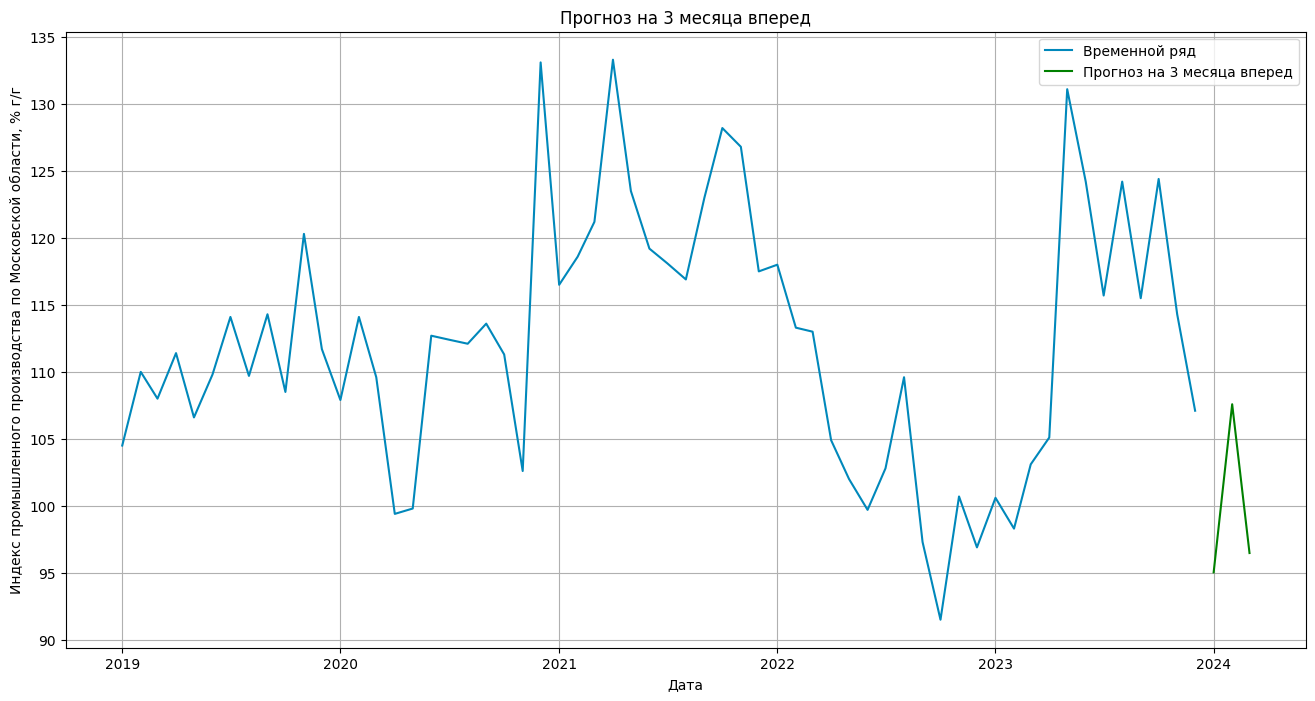

In [157]:
last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 135+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс промышленного производства по Московской области, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Московской области, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()